# Convolutional layer visualizer 

Visualizing a convolutional layer

In [13]:
%matplotlib inline 

import cv2
import matplotlib.pyplot as plt 
import numpy as np

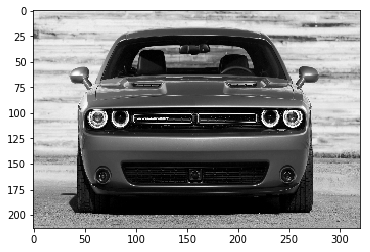

In [40]:
image = cv2.imread('images/challenger.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize image
image = cv2.resize(image, (320, 213))

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Normalize image 
gray_image = gray_image.astype("float32")/255

plt.imshow(gray_image, cmap='gray')

## Define and visualize the filters

In [44]:
filter_values = np.array([[-2, -2, 2, 2], [-2, -2, 2, 2], [-2, -2, 2, 2], [-2, -2, 2, 2]])
print("Filter shape: ", filter_values.shape)

Filter shape:  (4, 4)


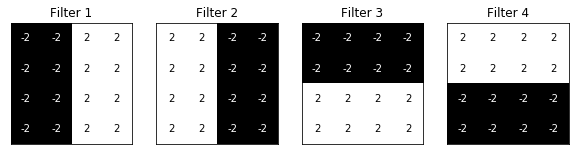

In [45]:
# Defining four different filters (combinations of the filter_values)
filter_1 = filter_values
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title("Filter %s" % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='white' if filters[i][x][y] < 0 else 'black')

## Define a convolutional layer

In [46]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

# Define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # Asssumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        
    def forward(self, x):
        # Calculates the output of a convolutional layer (pre- and post-activation)
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        return conv_x, activated_x
    
# Instantiate the model and set the weigths
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


## Visualize the output of each filter 

In [47]:
def viz_layer(layer, n_filters=4):
    """
    Visualize the output of a given layer
    """
    fig =plt.figure(figsize=(20,20))
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs 
        ax.imshow(np.squeeze(layer[0,1].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

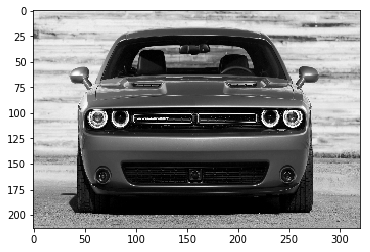

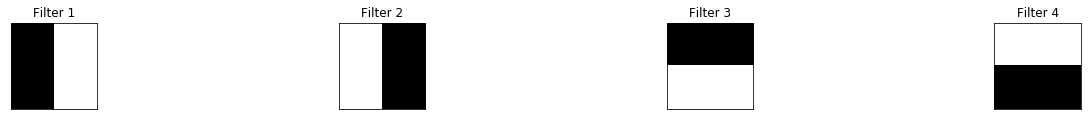

In [48]:
# plot original image
plt.imshow(gray_image, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# Convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(1)

# Get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

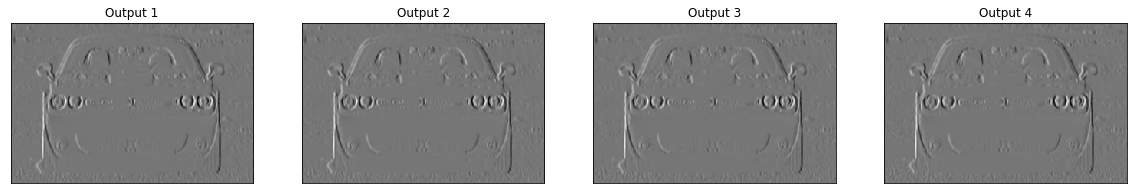

In [49]:
# Visualize the output of a conv layer 
viz_layer(conv_layer)

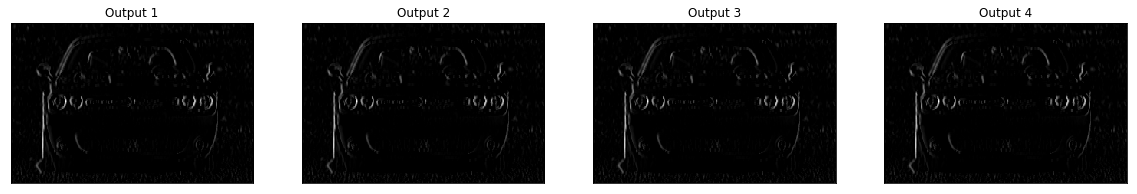

In [50]:
# Visualize the output of an activated conv layer
viz_layer(activated_layer)